# Program Pendeteksi Kualitas Biji Kopi
## Dibuat dengan bahasa Python

### Keterangan Kriteria
- ICS01 : Warna Biji Kopi Coklat
- ICS02 : Kulit Kopi Ukuran Kecil
- ICS03 : Kulit Tanduk Ukuran Kecil
- ICS04 : Biji Kopi Bertutul-tutul
- ICS05 : Biji Kopi Utuh
- ICS06 : Ranting, Tanang atau batu berukuran kecil
- ICS07 : Warna Biji Kopi Hitam Sebagian
- ICS08 : Kulit Kopi Ukuran Sedang
- ICS09 : Kulit Tanduk Ukuran Sedang
- ICS10 : Biji Kopi Berlubang satu
- ICS11 : Biji Kopi Pecah Kecil
- ICS12 : Ranting, Tanah, atau Batu berukuran sedang
- ICS13 : Warna Biji Kopi Hitam
- ICS14 : Kulit Kopi Ukuran Besar
- ICS15 : Kulit Tanduk Ukuran Besar
- ICS16 : Biji Kopi Berlubang lebih dari satu
- ICS17 : Biji Kopi Pecah Besar
- ICS18 : Ranting, Tanah, atau Batu Berukuran besar.

### Keterangan Rules sebagai berikut:
- Grade 1 : Nilai kecacatan kurang dari 11
- Grade 2 : dst



TABEL HASIL PERHITUNGAN NILAI KECACATAN BIJI KOPI
╒════╤═══════════════╤═══════════════════╤═════════╕
│    │ Nama Sample   │ Nilai Kecacatan   │ Grade   │
╞════╪═══════════════╪═══════════════════╪═════════╡
│ 0  │ A             │ 26.5              │ 3       │
├────┼───────────────┼───────────────────┼─────────┤
│ 1  │ B             │ 31.7              │ 3       │
├────┼───────────────┼───────────────────┼─────────┤
│ 2  │ C             │ 17.05             │ 2       │
├────┼───────────────┼───────────────────┼─────────┤
│ 3  │ D             │ 33.7              │ 3       │
├────┼───────────────┼───────────────────┼─────────┤
│ 4  │ E             │ 13.15             │ 2       │
├────┼───────────────┼───────────────────┼─────────┤
│ 5  │ F             │ 10.9              │ 1       │
├────┼───────────────┼───────────────────┼─────────┤
│ 6  │ G             │ 19.3              │ 2       │
├────┼───────────────┼───────────────────┼─────────┤
│ 7  │ H             │ 16.8              │ 2   

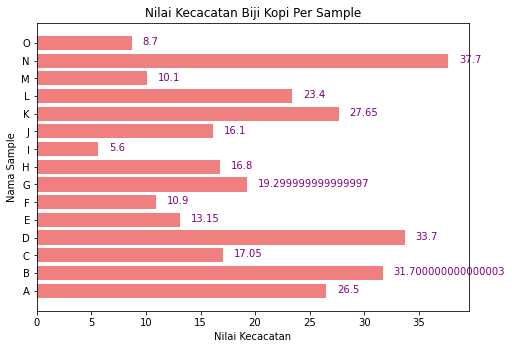

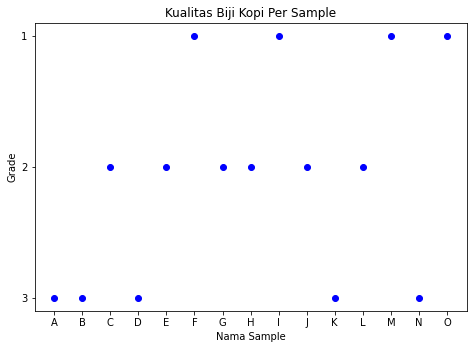

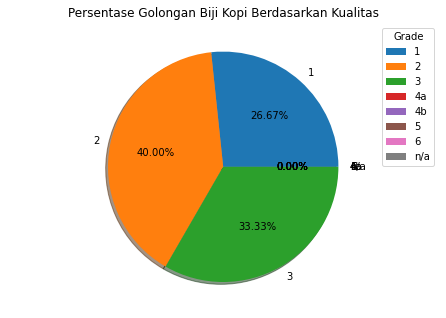

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# himpunan kriteria kecacatan kopi berdasarkan SNI
list_criteria = [['ICS01','biji hitam',1], 
                 ['ICS02','biji hitam sebahagian',0.5], 
                 ['ICS03','biji hitam pecah',0.5],
                 ['ICS04','gelondong',1], 
                 ['ICS05','biji cokelat',0.25], 
                 ['ICS06','kulit kopi (husk) ukuran besar',1],
                 ['ICS07','kulit kopi (husk) ukuran sedang',0.5], 
                 ['ICS08','kulit kopi (husk) ukuran kecil',0.2], 
                 ['ICS09','biji kulit tanduk',0.5],
                 ['ICS10','kulit tanduk ukuran besar',0.5], 
                 ['ICS11','kulit tanduk ukuran sedang',0.5], 
                 ['ICS12','kulit tanduk ukuran kecil',0.2],
                 ['ICS13','biji pecah',0.1],
                 ['ICS14','biji muda',0.2],
                 ['ICS15','biji berlubang satu',0.2],
                 ['ICS16','biji berlubang lebih dari satu',0.2],
                 ['ICS17','biji bertutul-tutul (untuk proses basah)',0.1],
                 ['ICS18','ranting tanah atau batu berukuran besar',5],
                 ['ICS19','ranting tanah atau batu berukuran sedang',2],
                 ['ICS20','ranting tanah atau batu berukuran kecil',1]] 


# himpunan yang mewakili grade atau kualitas kopi setelah perhitungan nanti
list_grade  = ['1', '2', '3', '4a', '4b', '5', '6', 'n/a']


# mengimpor dataset
dataset = pd.read_csv('kopi_dataset.csv')


# membuat data frame 
data = pd.DataFrame(dataset)
#print(data.head(8))


# mengambil label yang berisi nama sample
# misalnya sample A, B, C, dst
label = dataset.iloc[:, 20]


# mengambil value atau isi dari dataset yang merupakan nilai kecacatan
# tidak termasuk nama sample
val = dataset.iloc[:, :-1]


# meletakkan label kedalam array numpy
arrayLabel = np.array(label)


# fungsi untuk menggolongkan sample ke dalam grade tertentu
def grade(sum):
    if (sum < 11): 
        return list_grade[0]
    elif (sum <= 25) & (sum >= 12):
        return list_grade[1]
    elif (sum <= 44) & (sum >= 26):
        return list_grade[2]
    elif (sum <= 60) & (sum >= 45):
        return list_grade[3]
    elif (sum <= 80) & (sum >= 61):
        return list_grade[4]
    elif (sum <= 150) & (sum >= 81):
        return list_grade[5]
    elif (sum <= 225) & (sum >= 151):
        return list_grade[6]
    else:
        return list_grade[7]
    

# fungsi untuk membedakan masing masing grade
# grade A dikelompokkan dengan A, B dengan B, C dengan C, dst
def lihatGrade(allGrade):
    grade1 = 0
    grade2 = 0
    grade3 = 0
    grade4a = 0
    grade4b = 0
    grade5 = 0
    grade6 = 0
    grade7 = 0
    for gr in allGrade:
        if gr == list_grade[0]:
            grade1 += 1
        elif gr == list_grade[1]:
            grade2 += 1
        elif gr == list_grade[2]:
            grade3 += 1
        elif gr == list_grade[3]:
            grade4a += 1
        elif gr == list_grade[4]:
            grade4b += 1
        elif gr == list_grade[5]:
            grade5 += 1
        elif gr == list_grade[6]:
            grade6 += 1
        else:
            grade7 += 1
        grades = [grade1, grade2, grade3, grade4a, grade4b, grade5, grade6, grade7]
    return grades


# allValue adalah array untuk menyimpan seluruh nilai total kecacatan 
allValue = []


# allGrade adalah array untuk menyimpan seluruh grade berdasarkan nilai total kecacatan 
allGrade = []


# perkalian sample dengan nilai kecacatan (list_criteria)
# perulangan sebanyak jumlah sample (baris pada dataset)
for v in range(len(val)):
    nilai = dataset.iloc[v]
    total = 0 # total seluruh kriteria
    
    # perulangan sebanyak 20x, sesuai panjang list_criteria
    for n in range(len(list_criteria)):
        sub_total = list_criteria[n][2] * nilai[n] #nilai masing" kriteria
        total += sub_total 
        
    # memasukkan hasil total dan hasil grading ke dalam array    
    allValue.append(total)
    allGrade.append(grade(total))
    
# menggolongkan grade yang didapatkan masing-masing sample ke dalam array numpy
grades = np.array(lihatGrade(allGrade))


# membuat list untuk menyimpan nama sample, 
# hasil kalkulasi nilai kecacatan, dan
# hasil grading nilai kecacatan
allIn = []
for i in range(len(label)):
    col = []
    col.append(label[i])
    col.append(allValue[i])
    col.append(allGrade[i])
    allIn.append(col)
    
    
# mengubah list menjadi data frame
dataframe = pd.DataFrame(allIn)


# mengubah data frame menjadi tabel
# membuat table berdasarkan hasil perhitungan seluruh sample
print('\n')
print('TABEL HASIL PERHITUNGAN NILAI KECACATAN BIJI KOPI')
print(tabulate(dataframe, headers=['Nama Sample', 'Nilai Kecacatan', 'Grade'], 
               tablefmt='fancy_grid', numalign='left'))
print('\n')

# visualisasi menggunakan bar chart untuk melihat nilai kecacatan 
# dari masing-masing sample
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(arrayLabel,allValue, color = 'lightcoral')
plt.title('Nilai Kecacatan Biji Kopi Per Sample')
plt.xlabel('Nilai Kecacatan')
plt.ylabel('Nama Sample')
for i, v in enumerate(allValue):
    ax.text(v + 1, i -.1, str(v), color='purple')
plt.show()
print('\n')

# visualisasi menggunakan scatter plot untuk melihat grade 
# dari masing-masing sample
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(arrayLabel,allGrade, color = 'blue')
plt.title('Kualitas Biji Kopi Per Sample')
plt.xlabel('Nama Sample')
plt.ylabel('Grade')
plt.show()
print('\n')

# visualisasi menggunakan pie chart untuk melihat hasil penggolongan
# berupa persentase banyaknya golongan 1, 2, 3, dst
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(grades,labels=list_grade,autopct='%1.2f%%', shadow = True)
plt.title('Persentase Golongan Biji Kopi Berdasarkan Kualitas')
plt.legend(title= 'Grade')
plt.show()